In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Імпорт даних з файлу
url = 'https://docs.google.com/spreadsheets/d/1OPnEAT64Patnj_Ifhwn_pM1c15rsBNIoFrtz38A1_W4/edit?usp=sharing'
url = url[:url.rfind('/')] + '/export?format=csv'

df = pd.read_csv(url)
df


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [ ]:
# Перевірка пропущених значень
print(df.isnull().sum())

# Типи ознак
print(df.dtypes)

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64
ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


In [ ]:


# Заміна значень
df['Smoking status'] = df['Smoking status'].replace({'Yes': 1, 'No': 0})

# Перевірка результату
print(df['Smoking status'].value_counts())

# Видалення стовпців "Bedtime", "Wakeup time" та "ID"
df = df.drop(columns=['Bedtime', 'Wakeup time', 'ID'])

# Типи ознак
print(df.dtypes)

# Перевірка наявних стовпців
print(df.columns)

Smoking status
0    298
1    154
Name: count, dtype: int64
Age                         int64
Gender                     object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status              int64
Exercise frequency        float64
dtype: object
Index(['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


In [ ]:
# Заміна значень
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Перевірка результату
print(df['Gender'].value_counts())
print(df['Gender'].unique())

# Типи ознак
print(df.dtypes)

Gender
1    228
0    224
Name: count, dtype: int64
[0 1]
Age                         int64
Gender                      int64
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status              int64
Exercise frequency        float64
dtype: object


In [ ]:
# Виведення унікальних значень у всіх стовпцях
for column in df.columns:
    print(column, df[column].unique())

Age [65 69 40 57 36 27 53 41 11 50 55 30 28 32 21 43 52 24 29 63 35 23 47 18
 26 37 46 61 38 20 58 31 34  9 16 54 56 25 44 66 48 45 39 51 22 15 19 33
 42 68 14 49 62 64 59 10 13 60 67 17 12]
Gender [0 1]
Sleep duration [ 6.   7.   8.   7.5 10.   9.   8.5  5.   5.5]
Sleep efficiency [0.88 0.66 0.89 0.51 0.76 0.9  0.54 0.79 0.55 0.92 0.93 0.64 0.5  0.98
 0.83 0.71 0.84 0.91 0.95 0.65 0.57 0.68 0.94 0.87 0.82 0.63 0.59 0.77
 0.86 0.81 0.52 0.99 0.8  0.85 0.7  0.78 0.97 0.73 0.96 0.53 0.72 0.62
 0.75 0.58 0.6  0.74 0.67 0.61 0.69 0.56]
REM sleep percentage [18 19 20 23 27 28 24 25 15 22 26 30 21]
Deep sleep percentage [70 28 25 55 60 52 37 57 58 32 22 20 67 75 65 72 30 23 53 56 63 59 35 62
 51 24 27 18 40]
Light sleep percentage [12 53 10 52 18 17 47 20 45 22 48 50 62 13 19 16 54 15 55 21 46 56 51 14
 30 40  7 63 11]
Awakenings [ 0.  3.  1.  2.  4. nan]
Caffeine consumption [  0.  50.  nan  25.  75. 200. 100.]
Alcohol consumption [ 0.  3.  5.  1.  2. nan  4.]
Smoking status [1 0]
Exercise 

In [ ]:
from sklearn.impute import SimpleImputer

# Числові ознаки
num_features = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

# Створення об'єкта SimpleImputer для числових ознак замість пропущених значень медіаною
num_imputer = SimpleImputer(strategy='mean')

df[num_features] = num_imputer.fit_transform(df[num_features])

# Виведення унікальних значень у всіх стовпцях
for column in df.columns:
    print(column, df[column].unique())

Age [65 69 40 57 36 27 53 41 11 50 55 30 28 32 21 43 52 24 29 63 35 23 47 18
 26 37 46 61 38 20 58 31 34  9 16 54 56 25 44 66 48 45 39 51 22 15 19 33
 42 68 14 49 62 64 59 10 13 60 67 17 12]
Gender [0 1]
Sleep duration [ 6.   7.   8.   7.5 10.   9.   8.5  5.   5.5]
Sleep efficiency [0.88 0.66 0.89 0.51 0.76 0.9  0.54 0.79 0.55 0.92 0.93 0.64 0.5  0.98
 0.83 0.71 0.84 0.91 0.95 0.65 0.57 0.68 0.94 0.87 0.82 0.63 0.59 0.77
 0.86 0.81 0.52 0.99 0.8  0.85 0.7  0.78 0.97 0.73 0.96 0.53 0.72 0.62
 0.75 0.58 0.6  0.74 0.67 0.61 0.69 0.56]
REM sleep percentage [18 19 20 23 27 28 24 25 15 22 26 30 21]
Deep sleep percentage [70 28 25 55 60 52 37 57 58 32 22 20 67 75 65 72 30 23 53 56 63 59 35 62
 51 24 27 18 40]
Light sleep percentage [12 53 10 52 18 17 47 20 45 22 48 50 62 13 19 16 54 15 55 21 46 56 51 14
 30 40  7 63 11]
Awakenings [0.        3.        1.        2.        4.        1.6412037]
Caffeine consumption [  0.          50.          23.65339578  25.          75.
 200.         100.     

              Age      Gender  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean    40.285398    0.504425        7.465708          0.788916   
std     13.172250    0.500534        0.866625          0.135237   
min      9.000000    0.000000        5.000000          0.500000   
25%     29.000000    0.000000        7.000000          0.697500   
50%     40.000000    1.000000        7.500000          0.820000   
75%     52.000000    1.000000        8.000000          0.900000   
max     69.000000    1.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   
25%   

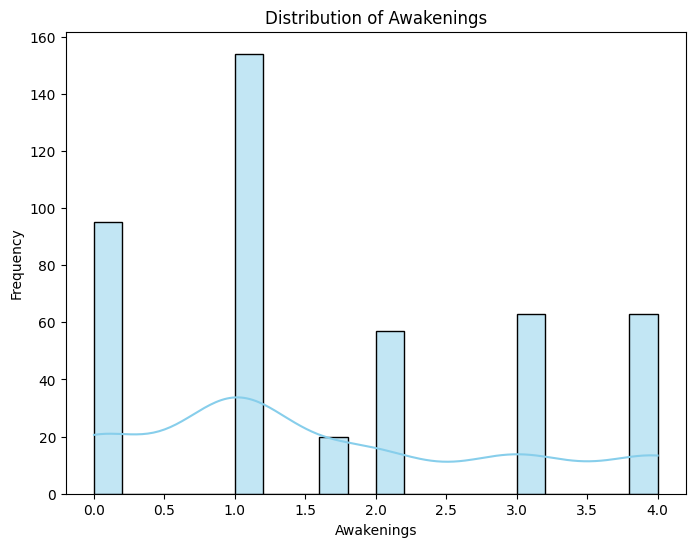

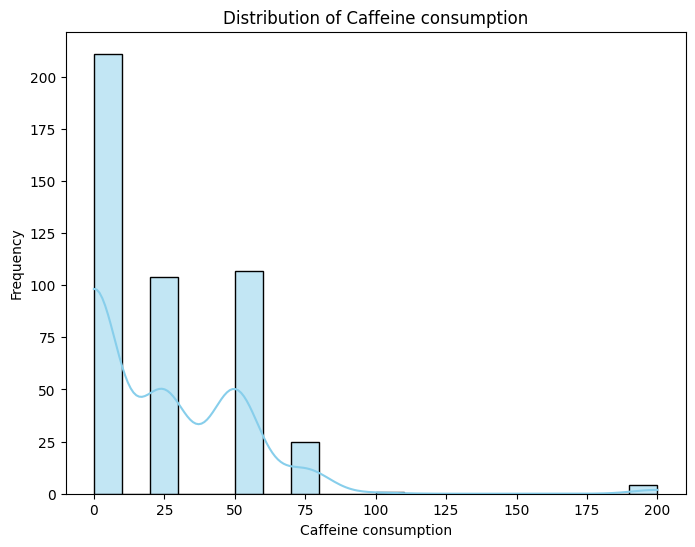

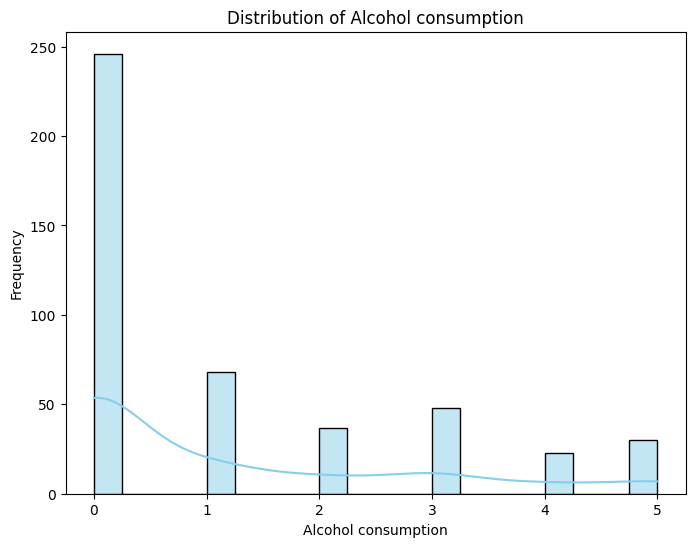

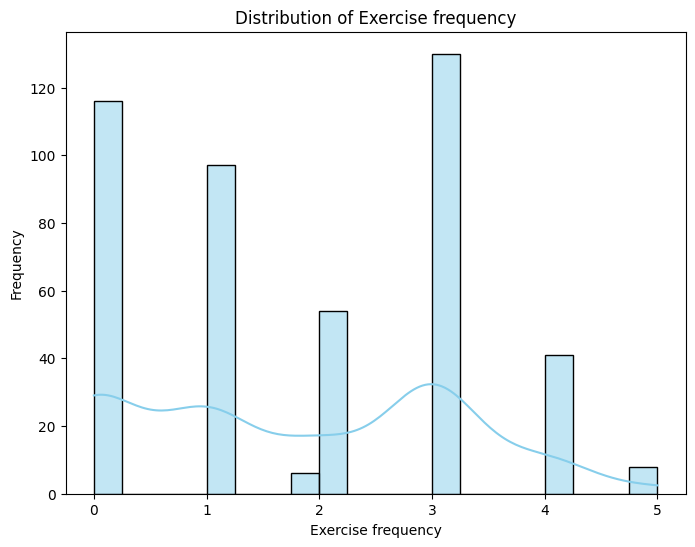

In [ ]:
# Описова статистика
print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Вибір кількісних ознак для побудови графіків розподілу
numeric_features = df[['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]


# Обчислимо дисперсію
variance = numeric_features.var()
print("Дисперсія:\n", variance)

# Обчислимо кореляцію
correlation = numeric_features.corr()
print("\nКореляція:\n", correlation)

# Побудова графіків розподілу
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Вибір цільової змінної та факторів
X = df.drop(columns=['Sleep efficiency'])
y = df['Sleep efficiency']

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова та навчання моделі лінійної регресії
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Побудова та навчання моделі дерева рішень
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

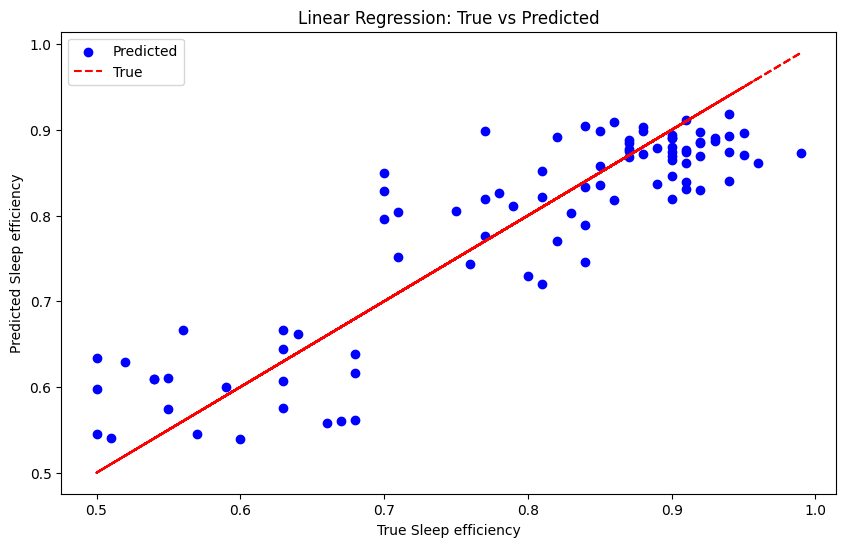

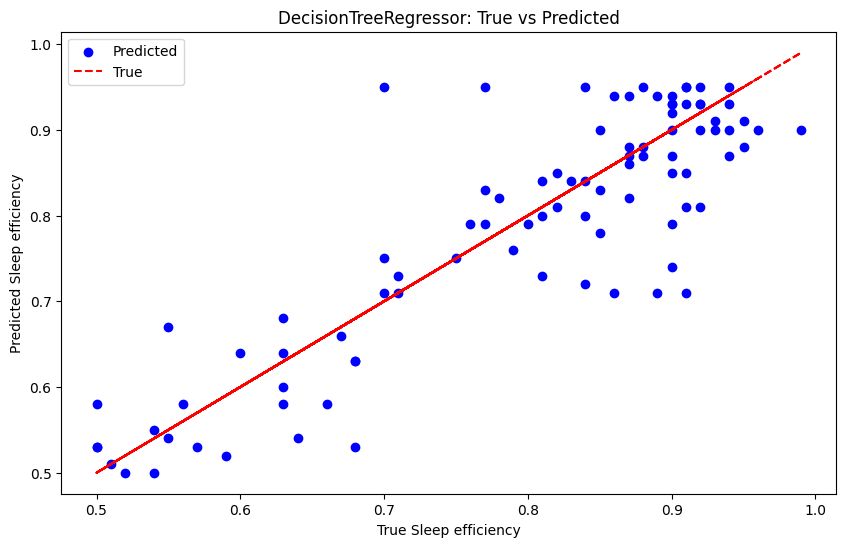

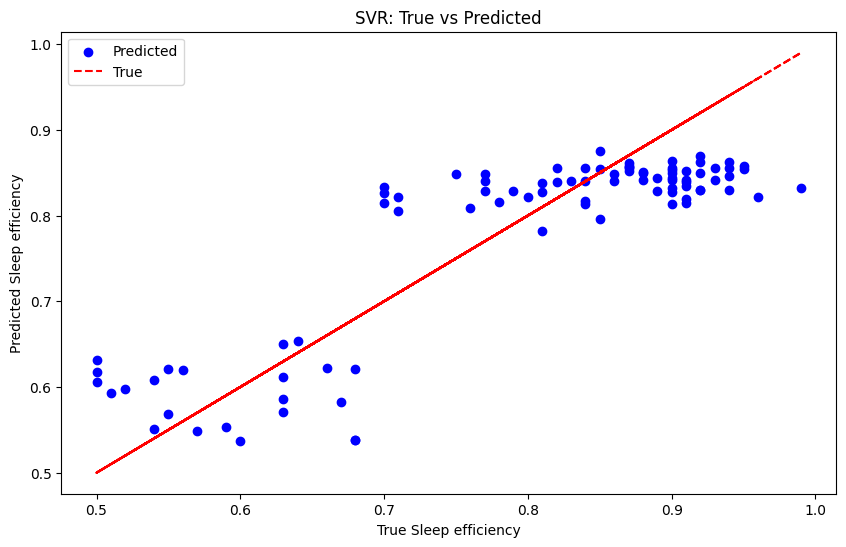

In [ ]:
# Графіки порівняння справжніх та спрогнозованих даних для лінійної регресії
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='True')
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Sleep efficiency')
plt.ylabel('Predicted Sleep efficiency')
plt.legend()
plt.show()

# Графіки порівняння справжніх та спрогнозованих даних для моделі DecisionTreeRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tree_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='True')
plt.title('DecisionTreeRegressor: True vs Predicted')
plt.xlabel('True Sleep efficiency')
plt.ylabel('Predicted Sleep efficiency')
plt.legend()
plt.show()

# Графіки порівняння справжніх та спрогнозованих даних для моделі SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='True')
plt.title('SVR: True vs Predicted')
plt.xlabel('True Sleep efficiency')
plt.ylabel('Predicted Sleep efficiency')
plt.legend()
plt.show()



За аналізом графіків порівняння справжніх та спрогнозованих даних, можна зробити наступні висновки про те, на яких прикладах кожна модель більше помиляється:

Лінійна регресія:

Зазвичай лінійна регресія більше помиляється на прикладах, де залежність між ознаками та цільовою змінною не є лінійною. Такі приклади можуть мати складну структуру або включати нелінійні взаємодії між ознаками.

Модель SVR:

Модель SVR може більше помилятися на прикладах, де є складні нелинійні взаємодії між ознаками або неоднорідність у розподілі даних.

Модель DecisionTreeRegressor:

Модель DecisionTreeRegressor може більше помилятися на прикладах, де вона перенавчилася на тренувальних даних. Це може відбуватися, коли модель надто вдосконалена під тренувальні дані і не може адекватно узагальнити нові дані.

Загалом, кожна модель може мати свої сильні та слабкі сторони, і важливо розуміти контекст задачі та особливості даних при виборі оптимальної моделі. Враховуючи ці фактори, можна прийняти обґрунтоване рішення щодо використання та налаштування моделей для конкретної задачі прогнозування.








In [ ]:
# Оцінка якості моделей

from sklearn.metrics import mean_squared_error, r2_score


tree_rmse = mean_squared_error(y_test, tree_pred, squared=False)
tree_r2 = r2_score(y_test, tree_pred)

print("DecisionTreeRegressor:")
print("RMSE:", tree_rmse)
print("R^2:", tree_r2)

linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
linear_r2 = r2_score(y_test, linear_pred)
svr_rmse = mean_squared_error(y_test, svr_pred, squared=False)
svr_r2 = r2_score(y_test, svr_pred)

print("Лінійна регресія:")
print("RMSE:", linear_rmse)
print("R^2:", linear_r2)
print()


print("SVR:")
print("RMSE:", svr_rmse)
print("R^2:", svr_r2)

DecisionTreeRegressor:
RMSE: 0.0704303880469188
R^2: 0.7335684755494039
Лінійна регресія:
RMSE: 0.06193574267004881
R^2: 0.7939616105561723

SVR:
RMSE: 0.07074862541797536
R^2: 0.7311553119362673


За наведеними метриками можна зробити наступні висновки:

Модель DecisionTreeRegressor:

RMSE для моделі DecisionTreeRegressor (0.0704) майже такий самий, як для моделі SVR. Коефіцієнт детермінації R^2 для DecisionTreeRegressor (0.7336) є близьким до значення для моделі SVR, але трохи вищим.


Лінійна регресія:

За значенням RMSE (0.0619) можна сказати, що середня квадратична помилка для лінійної регресії досить низька, що свідчить про те, що модель досить точно прогнозує цільову змінну.
Коефіцієнт детермінації R^2 (0.7939) також високий, що означає, що приблизно 79.4% варіації цільової змінної пояснюється моделлю.

Модель SVR:

RMSE для моделі SVR (0.0707) є трохи вищим, ніж для лінійної регресії, але все ще відносно низьким.
Коефіцієнт детермінації R^2 для SVR (0.7312) також є високим, але трохи нижчим, ніж для лінійної регресії. Це означає, що приблизно 73.1% варіації цільової змінної пояснюється моделлю SVR.


За обома метриками найкращою є лінійна регресія, оскільки вона має найменшу середньоквадратичну помилку і найвищий коефіцієнт детермінації. Модель SVR та модель DecisionTreeRegressor показують схожу якість, проте за R^2, модель DecisionTreeRegressor трохи краще за модель SVR.

Отже, для цих конкретних даних із прогнозуванням ефективності сну, лінійна регресія може бути найкращим варіантом моделювання. Однак важливо також врахувати контекст задачі та можливі особливості даних при виборі оптимальної моделі.